# Assignment_1

#### Github link: https://github.com/mohithashok/Programming_For_Datascience_Coursework

### Importing Libraries:

In [441]:
import numpy as np
import pandas as pd

### Question 1: Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [442]:
bat_data = pd.read_csv('Batting.csv')

In [443]:
bat_data.head()

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


### Question 2:	Print out the dimensions and info about the dataframe you just created

In [474]:
print(bat_data.shape)

(102816, 25)


In [475]:
print(bat_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

### Question 3:	How many players have hit 40 or more HRs in one single season? (Number only)

In [476]:
#Selecting the players through aggregation
q3 = bat_data.groupby(["playerID","yearID"], as_index = False)['HR'].sum()

#Displaying
print(q3[q3['HR'] >= 40]['playerID'].nunique())

142


### Question 4: How many players have hit more than 600 HRs for their career? (Dataframe)

In [477]:
#Selecting the players through aggregation
q4 = bat_data.groupby("playerID", as_index = False)['HR'].sum()

#Displaying
display(q4[q4['HR'] >= 600][['playerID','HR']].reset_index(drop=True))

,playerID,HR
0,aaronha01,755
1,bondsba01,762
2,griffke02,630
3,mayswi01,660
4,rodrial01,696
5,ruthba01,714
6,sosasa01,609
7,thomeji01,612


### Question 5: How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only)

In [478]:
#Selecting the players through aggregation
q5 = bat_data.groupby(["playerID","yearID"], as_index = False)['2B','3B','H','HR'].sum()

#Displaying the number of players
print(q5[(q5['2B']>=40) & (q5['3B']>=10) & (q5['H']>=200) & (q5['HR']>=30)]['playerID'].nunique())

11


### Question 6: How many players have had 100 or more SBs in a season? (Dataframe)

In [479]:
#Selecting the players through aggregation
q6 = bat_data.groupby(["playerID","yearID"], as_index = False)['SB'].sum()

#Displaying the players
display(q6[q6['SB'] >= 100][['playerID']].reset_index(drop=True).drop_duplicates().reset_index(drop=True))

,playerID
0,brocklo01
1,brownpe01
2,brownto01
3,colemvi01
4,comisch01
5,fogarji01
6,hamilbi01
7,henderi01
8,lathaar01
9,nicolhu01


### Question 7: How many players in the 1960s have hit more than 200 HRs? (Dataframe)

In [480]:
#Selecting the data for years 1960 to 1969
q7 = bat_data[(bat_data['yearID'] >= 1960) & (bat_data['yearID'] < 1970)][['playerID','HR']].reset_index(drop=True)

#Selecting the players by aggregation
q7_1 = q7.groupby('playerID',as_index=False)['HR'].sum()

#Displaying the players
display(q7_1[q7_1['HR']>200].reset_index(drop=True)[['playerID']].drop_duplicates('playerID'))

,playerID
0,aaronha01
1,allisbo01
2,bankser01
3,cashno01
4,cepedor01
5,colavro01
6,howarfr01
7,kalinal01
8,killeha01
9,mantlmi01


### Question 8: Who has hit the most HRs in history? (Dataframe)

In [481]:
#Aggregating based on playerID
q8 = bat_data.groupby('playerID',as_index=False)['HR'].sum()

#Displaying the player
display(q8[q8['HR']==(q8['HR'].max())].reset_index(drop=True))

,playerID,HR
0,bondsba01,762


### Question 9: Who had the most hits in the 1970s? (Dataframe)

In [482]:
#Selecting the data for 1970s
q9 = bat_data[(bat_data['yearID'] >= 1970) & (bat_data['yearID'] < 1980)][['playerID','H']].reset_index(drop=True)

#Aggregating based on playerID
q9_1 = q9.groupby('playerID',as_index=False)['H'].sum()

#Displaying the player
display(q9_1[q9_1['H']==(q9_1['H'].max())].reset_index(drop=True))

,playerID,H
0,rosepe01,2045


### Question 10: Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe)

In [484]:
#Selecting data for 1977
q10 = bat_data[bat_data['yearID']==1977].reset_index(drop=True)

#Aggregating based on playerID
q10_pw = q10.groupby('playerID',as_index=False)[['AB','BB','IBB','SH','SF','H']].sum()

#Calculating PA
q10_pw['PA'] = q10_pw['AB'] + q10_pw['BB'] + q10_pw['IBB'] + q10_pw['SH'] + q10_pw['SF']

#Selecting players with PA greater than or equal to 500
pa_500 = q10_pw[q10_pw['PA']>=500].reset_index(drop=True)

#Calculating OBP
pa_500['OBP'] = (pa_500['H'] + pa_500['BB'] + pa_500['IBB'] + pa_500['SH'] + pa_500['SF'])/pa_500['AB']

#Sorting
pa_500.sort_values('OBP',inplace=True,ascending=False)

In [485]:
#Displaying
display(pa_500.head(5).reset_index(drop=True))

,playerID,AB,BB,IBB,SH,SF,H,PA,OBP
0,singlke01,536,107,13.0,0.0,6.0,176,662.0,0.563433
1,smithre06,488,104,11.0,1.0,7.0,150,611.0,0.559426
2,tenacge01,437,125,10.0,2.0,4.0,102,578.0,0.556064
3,hargrmi01,525,103,7.0,8.0,6.0,160,649.0,0.540952
4,carewro01,616,69,15.0,1.0,5.0,239,706.0,0.534091


##### Note: PA= AB +BB + IBB + SH +SF; OBP(on base percentage)=(H+BB+IBB+SH+SF)/AB

### Question 11: Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe)

In [455]:
#Extract data for 2013
q11 = bat_data[bat_data['yearID']==2013].reset_index(drop=True)
q11_non_zero = q11[q11['AB']!=0].copy()

#Calculate PA >= 300
q11_non_zero_pw = q11_non_zero.groupby('playerID',as_index=False)[['AB','BB','IBB','SH','SF','H']].sum()
q11_non_zero_pw['PA'] = q11_non_zero_pw['AB'] + q11_non_zero_pw['BB'] + q11_non_zero_pw['IBB'] + q11_non_zero_pw['SH'] + q11_non_zero_pw['SF']
pa300 = q11_non_zero_pw[q11_non_zero_pw['PA']>=300].copy()

#Calculate Average:
pa300['AVG'] = pa300['H']/pa300['AB']
pa300.sort_values('AVG',inplace=True,ascending=False)
display(pa300.head(8).reset_index(drop=True))

,playerID,AB,BB,IBB,SH,SF,H,PA,AVG
0,cabremi01,555,90,19.0,0.0,2.0,193,666.0,0.347748
1,ramirha01,304,27,3.0,0.0,2.0,105,336.0,0.345395
2,cuddymi01,489,46,5.0,0.0,3.0,162,543.0,0.331288
3,mauerjo01,445,61,7.0,0.0,2.0,144,515.0,0.323596
4,troutmi01,589,110,10.0,0.0,8.0,190,717.0,0.322581
5,johnsch05,514,29,5.0,0.0,2.0,165,550.0,0.321012
6,freemfr01,551,66,10.0,0.0,5.0,176,632.0,0.319419
7,puigya01,382,36,6.0,0.0,3.0,122,427.0,0.319372


##### Note: Average = H/AB

### Question 12: Leaders in hits from 1940 up to and including 1949. (Dataframe)

In [456]:
#Extract data from 1940 to 1949
q12 = bat_data[(bat_data['yearID']>=1940) & (bat_data['yearID'] <= 1949) ].copy()

#Aggregating
q12_agg = q12.groupby(['playerID','nameFirst','nameLast'],as_index=False).sum()

#Sort with respect to number of hits
q12_agg.sort_values('H',inplace=True,ascending=False)

#Displaying Top-5 Leaders in hits
display(q12_agg[['playerID','nameFirst','nameLast','H']].head(5).reset_index(drop=True))

,playerID,nameFirst,nameLast,H
0,boudrlo01,Lou,Boudreau,1578
1,elliobo01,Bob,Elliott,1563
2,walkedi02,Dixie,Walker,1512
3,musiast01,Stan,Musial,1432
4,doerrbo01,Bobby,Doerr,1407


### Question 13: Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number)

In [490]:
#Aggregate w.r.t Player and Year
q13_py = bat_data.groupby(['playerID','yearID'],as_index=False)[['H']].sum().copy()

#Aggregate the result w.r.t Year and find max
q13_y = q13_py.groupby('yearID',as_index=False)[['H']].max().copy()

#Using Merge to find the Player with the most hits each year
q13_merged = pd.merge(q13_y,q13_py,how='left',on=['yearID','H']).copy()

#Finding the number of times each player scored the most hits in a year
q13_merged['Number_of_Times']=q13_merged.groupby('playerID',as_index=False)['yearID'].count()['yearID']
q13_merged.sort_values('Number_of_Times',inplace=True,ascending=False)

#Displaying the result
display(q13_merged.reset_index(drop=True).head(3))
print(str(q13_merged.iloc[0,2]) + " led MLB with " + str(q13_merged.iloc[0,3]) + " highest hits.")

,yearID,H,playerID,Number_of_Times
0,1950,218,kellge01,7.0
1,1893,222,thompsa01,7.0
2,1940,200,radclri01,7.0


kellge01 led MLB with 7.0 highest hits.


### Question 14: Which players have played the most games for their careers?  Top 5, descending by games played presented as a dataframe

In [458]:
#Aggregating based on playerID
q14 = bat_data.groupby('playerID',as_index=False).sum().copy()

#Sorting based on games played
q14.sort_values('G',inplace=True,ascending=False)

#Displaying the top-5 based on games played
display(q14.loc[:,['playerID','G']].head(5).reset_index(drop=True))

,playerID,G
0,rosepe01,3562
1,yastrca01,3308
2,aaronha01,3298
3,henderi01,3081
4,cobbty01,3035


### Question 15: How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [459]:
#Aggregating based on playerID
q15 = bat_data.groupby('playerID',as_index=False).sum().copy()

#Displaying the result
print(len(q15[(q15['H']>3000) & (q15['HR'] >= 500)].index))

5


### Question 16: How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [460]:
#Aggregating based on yearID
q16 = bat_data.groupby('yearID',as_index=False).sum().copy()

#Displaying the result
print(q16[q16['yearID']==1988]['HR'].item())

3180


### Question 17: Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs.  I would like a dataframe sorted by average.

In [491]:
#Shortlisting records of Wade Boggs
q17 = bat_data[(bat_data['nameFirst']=='Wade') & (bat_data['nameLast']=='Boggs')].copy()

#Filtering based on AB
q17_filtered = q17[q17['AB']>=500].copy()

#Calculating Average and storing in the Data Frame
q17_filtered['Average'] = (q17_filtered['H'] / q17_filtered['AB'])
q17_filtered.sort_values('Average',inplace=True,ascending=False)

#Displaying the result
display(q17_filtered.head(3).reset_index(drop=True))

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,Average
0,boggswa01,Wade,Boggs,1958,1985,1,BOS,AL,161,653,...,2.0,1.0,96,61.0,5.0,4.0,3.0,2.0,20.0,0.367534
1,boggswa01,Wade,Boggs,1958,1988,1,BOS,AL,155,584,...,2.0,3.0,125,34.0,18.0,3.0,0.0,7.0,23.0,0.366438
2,boggswa01,Wade,Boggs,1958,1987,1,BOS,AL,147,551,...,1.0,3.0,105,48.0,19.0,2.0,1.0,8.0,13.0,0.362976


### Question 18:  Please filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP.  I would like a dataframe for this

In [462]:
#Extract data for 2013
q18 = bat_data[bat_data['yearID']==1995].reset_index(drop=True)
q18_non_zero = q18[q18['AB']!=0].copy()

#Aggregating player-wise
q18_non_zero_pw = q18_non_zero.groupby('playerID',as_index=False)[['AB','BB','IBB','SH','SF','H']].sum()

#Calculate PA >= 400
q18_non_zero_pw['PA'] = q18_non_zero_pw['AB'] + q18_non_zero_pw['BB'] + q18_non_zero_pw['IBB'] + q18_non_zero_pw['SH'] + q18_non_zero_pw['SF']
pa400 = q18_non_zero_pw[q18_non_zero_pw['PA']>=400].copy()

#Calculate OBP
pa400['OBP'] = (pa400['H'] + pa400['BB'] + pa400['IBB'] + pa400['SH'] + pa400['SF'])/pa400['AB']

#Sort in terms of OBP and display the top 10 OBPs
pa400.sort_values('OBP',inplace=True,ascending=False)
display(pa400.reset_index(drop=True).head(10))


,playerID,AB,BB,IBB,SH,SF,H,PA,OBP
0,thomafr04,493,136,29.0,0.0,12.0,152,670.0,0.667343
1,martied01,511,116,19.0,0.0,4.0,182,650.0,0.628180
2,mcgwima01,317,88,5.0,0.0,6.0,87,416.0,0.586751
3,bondsba01,506,120,22.0,0.0,4.0,149,652.0,0.583004
4,davisch01,424,89,12.0,0.0,9.0,135,534.0,0.577830
5,magadda01,348,71,9.0,1.0,2.0,109,431.0,0.551724
6,thomeji01,452,97,3.0,0.0,3.0,142,555.0,0.542035
7,baineha01,385,70,13.0,0.0,4.0,115,472.0,0.524675
8,weisswa01,427,98,8.0,6.0,1.0,111,540.0,0.524590
9,boggswa01,460,74,5.0,0.0,7.0,149,546.0,0.510870


##### Note: Displaying the top-10 OBPs since the number of expected rows was not mentioned in the question.

### Question 19: Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with just the leader


In [463]:
#Extract data for 1922, 1925, 1926 and 1928
q19 = bat_data[(bat_data['yearID']==1922) | (bat_data['yearID']==1925) | (bat_data['yearID']==1926) | (bat_data['yearID']==1928)].reset_index(drop=True)

#Aggregating based on playerID
q19_agg = q19.groupby(['playerID','nameFirst','nameLast'],as_index=False).sum()

#Display the leader
display(q19_agg[q19_agg['3B'] == q19_agg['3B'].max()][['playerID','nameFirst','nameLast','3B']].reset_index(drop=True))

,playerID,nameFirst,nameLast,3B
0,walkecu01,Curt,Walker,59


### Question 20: How many players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [464]:
#Aggregating based on playerID and yearID
q20 = bat_data.groupby(['playerID','yearID'],as_index=False).sum().copy()

#Selecting players with SB values 30 or more
q20_sb = q20[q20['SB']>=30]

#Selecting and displaying the number of players with HR values 30 or more
print(q20_sb[q20_sb['HR']>=30]['playerID'].nunique())

38


### Question 21: Who had the highest OBP is 1986 with at least 400 PAs? (Dataframe)

In [465]:
#Extract data for 1986
q21 = bat_data[bat_data['yearID']==1986].reset_index(drop=True)

#Aggregating player-wise
q21_agg = q21.groupby('playerID',as_index=False).sum()

#Calculating PA
q21_agg['PA'] = q21_agg['AB'] + q21_agg['BB'] + q21_agg['IBB'] + q21_agg['SH'] + q21_agg['SF']

#Selecting Players with PA greater than or equal to 400
pa400 = q21_agg[q21_agg['PA']>=400].copy()

#Calculating OBP
pa400['OBP'] = (pa400['H'] + pa400['BB'] + pa400['IBB'] + pa400['SH'] + pa400['SF'])/pa400['AB']

#Displaying the Player with the highest OBP
display(pa400[pa400['OBP'] == pa400['OBP'].max()].reset_index(drop=True))

,playerID,birthYear,yearID,stint,G,AB,R,H,2B,3B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP
0,boggswa01,1958,1986,1,149,580,107,207,47,2,...,4.0,105,44.0,14.0,0.0,4.0,4.0,11.0,707.0,0.575862


### Question 22: Same question but for 1997 and only in the NL (check league ID)? (Dataframe)

In [466]:
#Extract data for 1986
q22 = bat_data[bat_data['yearID']==1997].reset_index(drop=True)

#Selecting Players in NL from the previous result
q22_1 = q22[q22['lgID']=='NL']

#Aggregating player-wise
q22_agg = q22_1.groupby('playerID',as_index=False).sum()

#Calculating PA
q22_agg['PA'] = q22_agg['AB'] + q22_agg['BB'] + q22_agg['IBB'] + q22_agg['SH'] + q22_agg['SF']

#Selecting Players with PA greater than or equal to 400
pa400 = q22_agg[q22_agg['PA']>=400].copy()

#Calculating OBP
pa400['OBP'] = (pa400['H'] + pa400['BB'] + pa400['IBB'] + pa400['SH'] + pa400['SF'])/pa400['AB']

#Displaying the Player with the highest OBP
display(pa400[pa400['OBP'] == pa400['OBP'].max()].reset_index(drop=True))

,playerID,birthYear,yearID,stint,G,AB,R,H,2B,3B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP
0,bondsba01,1964,1997,1,159,532,123,155,26,5,...,8.0,145,87.0,34.0,8.0,0.0,5.0,13.0,716.0,0.637218


### Question 23: Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)? (Dataframe)

In [502]:
#Extract data for 2012
q23 = bat_data[bat_data['yearID']==2012].reset_index(drop=True)

#Aggregating player-wise
q23_agg = q23.groupby(['playerID','lgID'],as_index=False).sum()

#Calculating the league average HRs
hr = q23.groupby('lgID',as_index=False)[['HR']].mean()

#Calculating PA
q23_agg['PA'] = q23_agg['AB'] + q23_agg['BB'] + q23_agg['IBB'] + q23_agg['SH'] + q23_agg['SF']

#Selecting Players with PA greater than or equal to 500
pa500 = q23_agg[q23_agg['PA']>=500].copy()

#Merging player details with league averages
q23_res = pd.merge(pa500,hr,how='left',on='lgID')

#Displaying Players who had HRs higher than the league average
display(q23_res[q23_res['HR_x']>q23_res['HR_y']][['playerID','lgID','HR_x','HR_y']].sort_values('HR_x',ascending=False).reset_index(drop=True))

,playerID,lgID,HR_x,HR_y
0,cabremi01,AL,44,3.822630
1,grandcu01,AL,43,3.822630
2,hamiljo03,AL,43,3.822630
3,encared01,AL,42,3.822630
4,dunnad01,AL,41,3.822630
5,braunry02,NL,41,3.228117
6,stantmi03,NL,37,3.228117
7,beltrad01,AL,36,3.822630
8,willijo03,AL,35,3.822630
9,bruceja01,NL,34,3.228117


### Question 24: Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe)

In [468]:
#Aggregating based on playerID, birthYear and yearID
q24 = bat_data.groupby(['playerID','yearID','birthYear','nameFirst','nameLast'],as_index=False).sum().copy()

#Selecting players with HR greater than or equal to 50
hr50 = q24[q24['HR']>=50].copy()

#Calculating approximate age when scoring 50 HRs a season
hr50['Req_Age'] = hr50['yearID'] - hr50['birthYear']

#Displaying the youngest player to hit 50 or more HRs in a season
display(hr50[hr50['Req_Age']== (hr50['Req_Age'].min())][['playerID','nameFirst','nameLast','yearID','birthYear','HR','Req_Age']].reset_index(drop=True))

,playerID,nameFirst,nameLast,yearID,birthYear,HR,Req_Age
0,fieldpr01,Prince,Fielder,2007,1984,50,23


### Question 25: Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe)

In [469]:
#Finding the cumulative sum after aggregating based on playerID, birthYear and yearID
q25 = bat_data.groupby(['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID']).sum().groupby(level=0).cumsum().reset_index().copy()

#Sorting
q25 = q25[q25['HR'] >= 300].sort_values(by = ['yearID', 'birthYear', 'playerID'])[['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID', 'HR']]

#Finding the required age
q25['Req_Age'] = q25['yearID'] - q25['birthYear']

#Displaying the five youngest players to hit 300 or more HRs
display(q25.sort_values(by = 'Req_Age', ascending = True).head(5).reset_index(drop=True))

,playerID,nameFirst,nameLast,birthYear,yearID,HR,Req_Age
0,pujolal01,Albert,Pujols,1980,2008,319,28
1,ottme01,Mel,Ott,1909,1937,306,28
2,jonesan01,Andruw,Jones,1977,2005,301,28
3,foxxji01,Jimmie,Foxx,1907,1935,302,28
4,rodrial01,Alex,Rodriguez,1975,2003,345,28


## Bonus Questions:

### Importing Libraries:

In [470]:
import matplotlib.pyplot as plt

%matplotlib inline

### Bonus 1: Graph total HRs per season using bar graph

In [471]:
#Aggregating based on yearID
b1 = bat_data.groupby('yearID',as_index=False).sum().copy()
b1['HR']

0        47
1        35
2        46
3        40
4        40
5        40
6        24
7        23
8        58
9        62
10       76
11      178
12      238
13      690
14      323
15      413
16      606
17      521
18      667
19      760
20      586
21      417
22      460
23      627
24      484
25      404
26      367
27      299
28      350
29      254
       ... 
116    4458
117    3180
118    3083
119    3317
120    3383
121    3038
122    4030
123    3306
124    4081
125    4962
126    4640
127    5064
128    5528
129    5693
130    5458
131    5059
132    5207
133    5451
134    5017
135    5386
136    4957
137    4878
138    5042
139    4613
140    4552
141    4934
142    4661
143    4186
144    4909
145    5610
Name: HR, Length: 146, dtype: int64

Text(0.5,1,'Total HRs per Season')

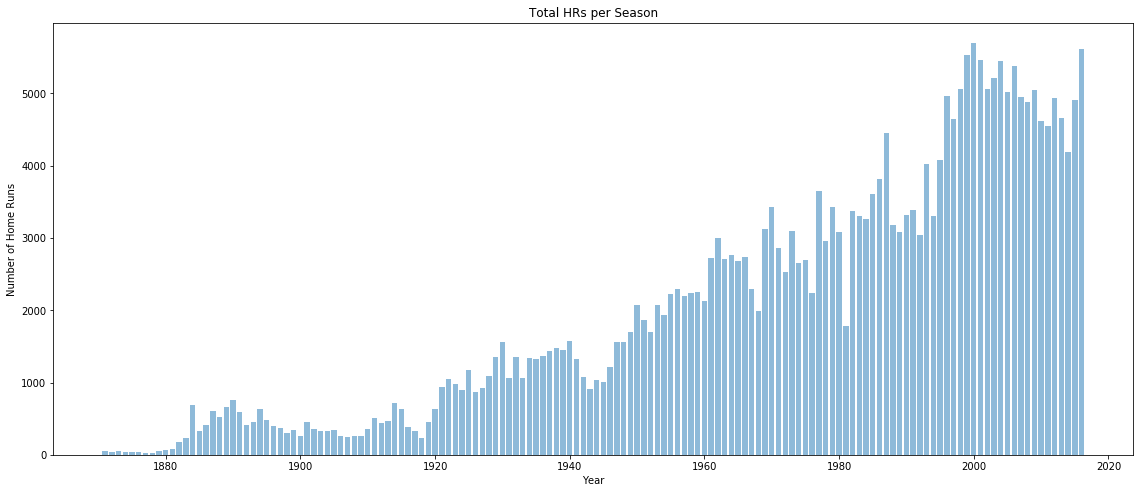

In [472]:
# Create Figure
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 2.5, 1.5])

#Ploting the total HRs per season using bar graph
axes.bar(b1['yearID'], b1['HR'], align='center', alpha=0.5)
axes.set_ylabel('Number of Home Runs')
axes.set_xlabel('Year')
axes.set_title('Total HRs per Season')
 

### Bonus 2: Using a line graph please graph the average HRs per AB (think about this) per season

Text(0.5,1,'Average HRs per AB per Season')

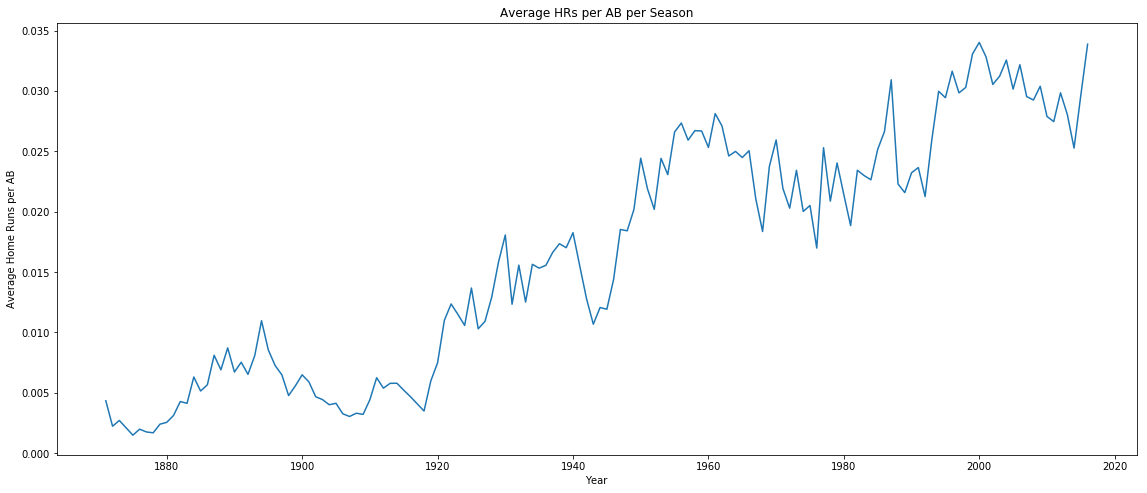

In [473]:
#Aggregating based on yearID
b2 = bat_data.groupby('yearID',as_index=False).mean().copy()
b2['Req_Avg'] = b2['HR']/b2['AB']

# Create Figure
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 2.5, 1.5])

#Ploting the total HRs per season using bar graph
axes.plot(b2['yearID'], b2['Req_Avg'])
axes.set_ylabel('Average Home Runs per AB')
axes.set_xlabel('Year')
axes.set_title('Average HRs per AB per Season')